Python for Data Analysis, GMC, Vilnius University, 2025

# HW4: Training a succesfull machine learning (ML) model

- **Tasks in this homework are built around a single data file** which should be downloaded in the Notebook as asked in the cell after the imports.
- Packages allowed to be imported (but not necessarily needed): `scikit-learn`, `numpy`, `pandas`, `matplotlib`, `seaborn`, `tqdm`, `itertools`, `math`, `string`. Do not import any other packages.
- **You will need to upload your solutions into your Github repository** dedicated for the Python for Data Analysis course. Use the same repository used for Homework 3.
- Same requirements as for Homework 3:
   - Do not write docstrings (function description comments).
   - Keep prints informative.
   - Do not create classes.
   - Do not change assert statements.

There are 5 tasks in this Notebook. They have slightly different numbers of points between them, with subpoints shown for each subtask e.g. (0.2p). You need to collect 8 points in total to get the maximum grade.

As previously, each task consists of a text cell with task description, a code cell to solve the task, and a code cell with `assert` statements to check your code for *some* possible errors.

Don't hesitate to contact me or Martynas if you are stuck.

In [1]:
# your imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import itertools
import math
import string

In [2]:
# download the file using the link provided, by any method you like/understand the most,
# but the downloading process should happen inside the Notebook.
file_url = "https://github.com/Tallivm/vu-python/blob/main/hw4_2025.csv"
!curl -L  -o hw4_2025.csv https://raw.githubusercontent.com/Tallivm/vu-python/main/hw4_2025.csv

data = pd.read_csv('hw4_2025.csv')
data.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  115k  100  115k    0     0   299k      0 --:--:-- --:--:-- --:--:--  302k


,Unnamed: 0,snail_genus,leaf_width_mm,leaf_length_mm,leaf_surface,shell_height_mm,shell_color,shell_radius_mm
0,0,Spiralina,69.0,114.0,hairy,7.0,striped,5.0
1,1,Slimospira,51.0,34.0,hairy,4.0,yellow,4.0
2,2,Mollisphora,47.0,114.0,hairy,6.0,striped,7.0
3,3,Flexorus,44.0,25.0,smooth,5.0,dark,5.0
4,4,Slimospira,12.0,68.0,smooth,5.0,yellow,5.0


In [3]:
# Run this cell to store the name of the column to predict.
# Use this variable when needed.
TO_PREDICT = 'snail_genus'

# 🍂 Task 1 (1 point): The new challenge

Some researchers who collected data for SNAILAB complained that measuring a single sample takes a lot of time and is quite difficult. Many snails are actually found on fallen leaves, not on whole plants, making several measurements impossible to make. Moreover, if a snail hides inside its shell, for certain measurements the researcher is forced to wait until the snail fully appears again.

An intern from SNAILAB suggested that they could use AI to solve this issue. After several discussions, they decided to train a model which would **predict the genus of a snail** from only easy-to-measure features. The intern prepared some useful data but then got sick. So, SNAILAB asks for your help once more.

You will need to train several simple models to predict snail genus for a provided data set, and select the best model.

But first - the provided **data should be explored**!

1. (0.2p) Load the data as a DataFrame, name it `raw`. Make sure the "Unnamed: 0" column is not formed by providing correct parameters into the `read_csv()` function. Print out a short report (in any format you like, make it a function) using f-strings and containing this information:
   - Number of NaN values in total, and if there are NaNs, then in which columns and how many;
   - Min, mean, and max values of each numeric column;
   - Unique values and their counts of each categorical column.

2. (0.4p) According to the report, make certain changes to the data and name the result `clean`:
   - If there are NaNs, remove full rows with them;
   - Remove full rows containing seemingly incorrect measurement values (e.g. negative values for length measurements).
   - Even if these steps were not required for this data, do it nevertheless, in a way that could be applicable to any dataset with such requirements (but maybe different columns and values).

3. (0.1p) Print out the report again using the previously written function.

4. (0.3p) Obtain and visualize a Spearman correlation matrix (as a heatmap) for all numeric columns. Make sure colormap is used correctly (divergent, zero in the middle), and the plot contains column names.

===NaN values===
Number of NaN values in total: 8
NaNs are:
snail_genus        1
leaf_width_mm      1
leaf_surface       1
shell_height_mm    1
shell_color        1
shell_radius_mm    3
dtype: int64

===Min, mean, and max values of each numeric column===
      leaf_width_mm  leaf_length_mm  shell_height_mm  shell_radius_mm
min        1.000000        2.000000        -9.000000        -7.000000
mean      46.636084       62.246738         6.433397         6.524395
max       83.000000      133.000000        12.000000        13.000000

===Unique values===
Column: snail_genus
snail_genus
Flexorus       440
Caracolus      415
Slimospira     403
Mollisphora    391
Lunaspira      381
Helixoda       300
Spiralina      275
Name: count, dtype: int64
Column: leaf_surface
leaf_surface
waxy      968
smooth    844
hairy     793
Name: count, dtype: int64
Column: shell_color
shell_color
dark       1084
yellow      936
striped     451
white        74
brown        60
Name: count, dtype: int64
===NaN values

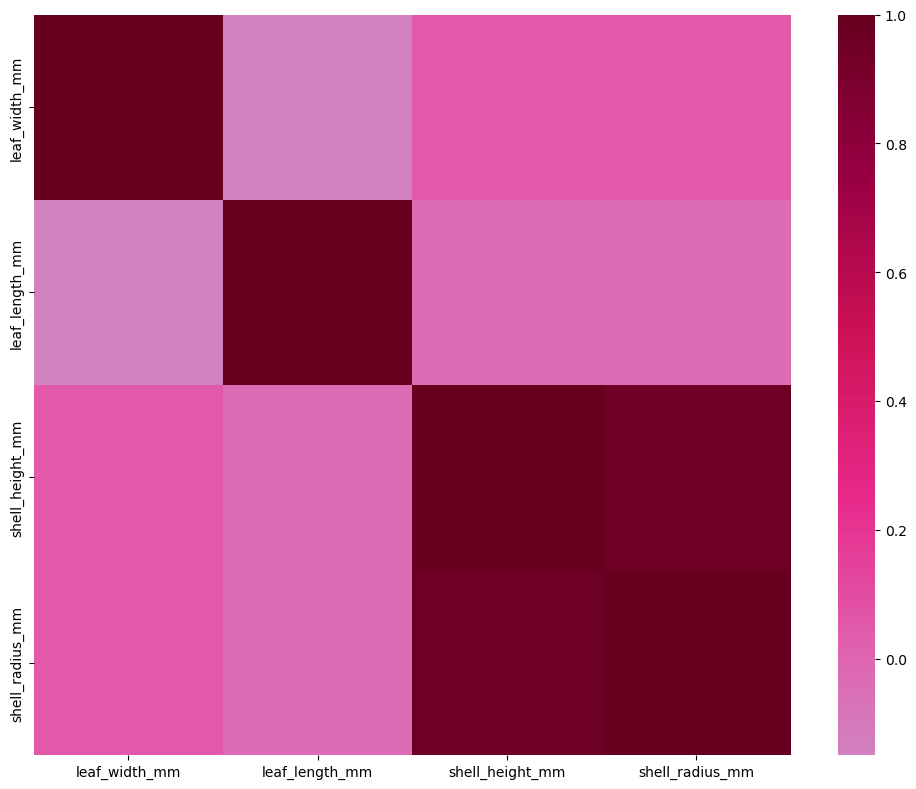

In [4]:
# your code
#1 
raw = pd.read_csv('hw4_2025.csv', index_col=0)
def report(df):
    print('===NaN values===')
    total_nans = df.isna().sum().sum()
    print(f'Number of NaN values in total: {total_nans}')
    if total_nans > 0:
        print("NaNs are:")
        print(df.isna().sum()[raw.isna().sum() > 0])

    print('\n===Min, mean, and max values of each numeric column===')
    numeric = df.select_dtypes(include=[np.number])
    print(numeric.describe().loc[["min", "mean", "max"]])
    
    print('\n===Unique values===')
    unique = df.select_dtypes(exclude=[np.number])
    for col in unique.columns:
        print(f'Column: {col}')
        print(df[col].value_counts())
report(raw)
#2
clean = raw.dropna().copy()
numeric_cols = clean.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    clean = clean[clean[col] >= 0]
#3
report(clean)
#4
numeric_clean = clean.select_dtypes(include=[np.number])
corr = numeric_clean.corr('spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='PuRd', center=0, xticklabels=corr.columns, yticklabels=corr.columns)
plt.tight_layout()

    

In [5]:
assert isinstance(raw, pd.DataFrame)
assert isinstance(clean, pd.DataFrame)
assert clean.isna().sum().sum() == 0
assert len(raw.columns) == len(clean.columns)
assert TO_PREDICT in raw.columns
assert TO_PREDICT in clean.columns

# 🔨 Task 2 (1 point): Data transformation and preparation for training

Next step is to prepare data for the model training. The DataFrame created during this task should be called `transformed`.

1. (0.4p) Standardize numeric columns:
   - using the `scikit-learn` package;
   - using just `numpy`;
   - Compare results and show that they are the same or similar enough. If there is any difference, notice how big it is.
2. (0.3p) Encode all categorical columns except snail genus using one-hot encoding from `pandas` or `scikit-learn`. Make sure that in the end, there are N-1 columns for a categorical column with N unique values. Make sure that old categorical columns are not left in the data.
3. (0.2p) Encode the snail genus as integer column using `pandas` or `numpy`. Make sure to create a dictionary `snail_classes` mapping snail genera and integers.
4. (0.1p) Create `X` and `y` from the whole data. The `X` should contain all columns except the snail genus column, and the `y` should contain only the snail genus column and be a `Series` object.

In [6]:
# your code
#1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_scaled_sklearn = scaler.fit_transform(clean[numeric_cols])
numeric_scaled_sklearn = pd.DataFrame(numeric_scaled_sklearn, columns=numeric_cols, index=clean.index)

numeric_scaled_np = (clean[numeric_cols] - clean[numeric_cols].mean()) / clean[numeric_cols].std()

print('Sklearn vs Numpy:')
print((numeric_scaled_sklearn - numeric_scaled_np).abs().mean())

#2
categorical_cols = clean.select_dtypes(exclude=[np.number]).columns
categorical_cols = [col for col in categorical_cols if col != TO_PREDICT]
categorical_cols
one_hot = pd.get_dummies(clean[categorical_cols], drop_first=True).astype(int)
one_hot.head()

#3
snail_genus_category = clean[TO_PREDICT].astype("category")
snail_genus_integer = snail_genus_category.cat.codes
snail_classes = dict(enumerate(snail_genus_category.cat.categories))
print('Snail classes mapping:')
print(snail_classes)

#4
transformed = pd.concat([numeric_scaled_sklearn, one_hot], axis=1)
transformed[TO_PREDICT] = snail_genus_integer.astype(int)
X = transformed.drop(columns=[TO_PREDICT])
y = transformed[TO_PREDICT]


Sklearn vs Numpy:
leaf_width_mm      0.000167
leaf_length_mm     0.000167
shell_height_mm    0.000155
shell_radius_mm    0.000156
dtype: float64
Snail classes mapping:
{0: 'Caracolus', 1: 'Flexorus', 2: 'Helixoda', 3: 'Lunaspira', 4: 'Mollisphora', 5: 'Slimospira', 6: 'Spiralina'}


In [7]:
assert isinstance(transformed, pd.DataFrame)
assert transformed.isna().sum().sum() == 0
assert len(transformed.columns) > len(clean.columns)
assert TO_PREDICT in transformed.columns
assert transformed[TO_PREDICT].dtype == int
assert str not in transformed.dtypes  # CHECK IF WORKS
assert 2 in transformed[TO_PREDICT]
assert isinstance(X, pd.DataFrame)
assert len(X.columns) == len(transformed.columns) - 1
assert isinstance(y, pd.Series)
assert isinstance(snail_classes, dict)

# 🎓 Task 3 (1 point): Model training and evaluation

Write a function named `split_and_train_model` which uses the standard model training pipeline:
- It should take `X`, `y`, `random_seed`, and a function (type `Callable`) to create the model. It should also take an optional `max_iter` parameter with default value of 300.
- Inside, it should:
   - Correctly split `X` and `y` into `X_train`, `y_train`, `X_test`, `y_test`. You can use different names but the structure should remain the same. Use test size of 20%. Use `random_seed` to fix the random state of data splitting.
   - Create an instance of the chosen model (by calling the provided function), with its random seed fixed to `random_seed` parameter.
   - Use the model to fit `X_train` and `y_train`.
   - Use the fitted model to generate predictions from `X_test`.
   - Calculate the accuracy score by comparing `y_test` and obtained predictions. Print out the score (formatted using f-string).
   - Return the trained model.
   - In case of **any** exception, do not raise it, but print out the error message and return `None` instead.

As an usage example, use this function with the data prepared in Task 2 and `LogisticRegression` from `scikit-learn`.

In [8]:
# your code
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def split_and_train_model(X, y, random_seed, model_func, max_iter=300):
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
        model = model_func(random_state=random_seed, max_iter=max_iter)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {acc}')
        return model
    except Exception as e:
        print('Error during training:', e)
        return 
from sklearn.linear_model import LogisticRegression

split_and_train_model(X, y, random_seed=42, model_func=LogisticRegression)

Accuracy: 0.7192307692307692


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [88]:
# no asserts there!

# 🧩 Task 4 (2 points): Feature extraction - clustering

Someone from SNAILAB theorized that knowing the genus of the plant which the leaf belongs to should help predict the genus of the snail, as certain snails are attracted to certain plants. However, the dataset does not contain plant names, and either way, plant identification requires additional time and skill.

Instead, you can use unsupervised learning to cluster plant features and use this information as a new feature.

1. (0.1p) Create a new DataFrame `plants` containing only plant features from `transformed`. Here, you are allowed to write column names manually.
2. (0.9p) You will use several clustering methods: [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html), [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html), and [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). They allow to provide different clustering parameters. Create a list `cluster_setups` containing `tuple[str, Callable, dict]` items (setups), where `str` is a short model name just for printing purposes, `Callable` is the clustering function (which you will call), and `dict` is a dictionary of 1-2 parameters to provide to that function.
   - There should be several setups for each clustering method. Use `for` loops to create those setups automatically by going through lists of possible parameters. You are allowed to write the lists manually or use `np.linspace` and similar functions:
      - For Affinity Propagation, use 2-3 different `damping` values between 0.6 and 0.9;
      - For Spectral Clustering and KMeans, use 4-5 `n_clusters` values between 3 and 20.
      - For DBSCAN, use 4-5 `eps` values between 0.1 and 0.5, and 4-5 `min_samples` values between 5 and 40 (so each DBSCAN setup had two provided parameters instead of one).
3. (1.0p) For each setup in `cluster_setups`, fit a clustering model on `plants` data and get the preidcted labels for all plants. Save the labels into a dictionary `obtained_clusters` which should be of type `dict[str, list]`, The `str` keys should be some kind of automatically generated short model descriptions (e.g. use f-string and include used parameter values in it). The `list` values should be lists of predicted cluster labels.
   - You may want to use `tqdm` at this point, as some clustering methods are slower.

In [44]:
# your code
#1
# 
plant_columns = [c for c in transformed.columns if c.startswith('leaf_')]
plants = transformed[plant_columns].copy()
#2 
from sklearn.cluster import AffinityPropagation, DBSCAN, SpectralClustering, KMeans
cluster_setups = []
damping_values = [0.6, 0.75, 0.9]
for d in damping_values:
    name = f'Affinity_{d}'
    parameters = {'damping': d}
    cluster_setups.append((name, AffinityPropagation, parameters))

spectral_k_values = [3, 6, 9, 12, 15]
for k in spectral_k_values:
    name = f'Spectral_{k}'
    parameters = {'n_clusters': k}
    cluster_setups.append((name, SpectralClustering, parameters))

kmeans_k_values = [4, 8, 12, 16, 20]
for k in kmeans_k_values:
    name = f'KMeans_{k}'
    parameters = {'n_clusters': k}
    cluster_setups.append((name, KMeans, parameters))

eps_values = [0.1, 0.2, 0.3, 0.4]
min_samples_values = [5, 10, 20, 30]

for eps in eps_values:
    for sm in min_samples_values:
        name = f'DBSCAN_eps{eps}_sm{sm}'
        parameters = {'eps': eps, 'min_samples': sm}
        cluster_setups.append((name, DBSCAN, parameters))

#3
obtained_clusters = {}
for setup in tqdm(cluster_setups):
    name, cluster_func, parameters = setup
    model = cluster_func(**parameters)
    labels = model.fit_predict(plants)
    obtained_clusters[name] = list(labels)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:38<00:00,  1.32s/it]


In [43]:
assert isinstance(plants, pd.DataFrame)
assert isinstance(cluster_setups, list)
assert isinstance(obtained_clusters, dict)
assert len(cluster_setups) == len(obtained_clusters)
assert len(cluster_setups) >= 26

# 👑 Task 5 (2 points): Using extracted features to improve the result

The only thing left now is to check which clustering setup produced a new feature (predicted plant clusters) which improves the Logistic Regression model trained in Task 3.

1. (1.0p) For each plant clustering result from Task 4, check if it improves the accuracy of logistic regression:
   - Create a new variable `XX` containing the `X` from Task 2 but joined with the new feature. If the shape of `X` was (M, N), then the shape of `XX` should be (M, N+1).
   - Using already written `split_and_train_model` function, create and fit a new logistic regression model on `XX` (`y` remains unchanged from Task 2). You may need to increase `max_iter` here. Don't forget to use the same random seed for all models.
2. (1.0p) Automatically find the feature which produced the best result from all trained Logistic Regression models. Print out its name and received accuracy score.

In [53]:
# your code

results = {}

for name, labels in obtained_clusters.items():
    XX = pd.concat([X, pd.Series(labels, index=X.index, name=name)],axis=1)
    split_and_train_model(XX, y, random_seed=42, model_func=LogisticRegression, max_iter=2000)

    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)

    model = LogisticRegression(random_state=42, max_iter=2000)
    model.fit(X_train, y_train)

    acc = accuracy_score(y_test, model.predict(X_test))
    results[name] = acc

best_name = max(results, key=results.get)
best_acc = results[best_name]

print(f'Best feature: {best_name}')
print(f'Accuracy: {best_acc}')


Accuracy: 0.7269230769230769
Accuracy: 0.7519230769230769
Accuracy: 0.7365384615384616
Accuracy: 0.801923076923077
Accuracy: 0.775
Accuracy: 0.7423076923076923
Accuracy: 0.7442307692307693
Accuracy: 0.7480769230769231
Accuracy: 0.698076923076923
Accuracy: 0.7461538461538462
Accuracy: 0.7769230769230769
Accuracy: 0.7961538461538461
Accuracy: 0.7846153846153846
Accuracy: 0.7538461538461538
Accuracy: 0.7461538461538462
Accuracy: 0.7230769230769231
Accuracy: 0.7115384615384616
Accuracy: 0.7826923076923077
Accuracy: 0.7788461538461539
Accuracy: 0.7557692307692307
Accuracy: 0.7576923076923077
Accuracy: 0.7519230769230769
Accuracy: 0.7230769230769231
Accuracy: 0.7807692307692308
Accuracy: 0.7826923076923077
Accuracy: 0.7326923076923076
Accuracy: 0.7326923076923076
Accuracy: 0.7384615384615385
Accuracy: 0.725
Best feature: Spectral_3
Accuracy: 0.801923076923077


In [ ]:
# no asserts again!